# Introduction to Quantum Computing: From Fundamentals to Quantum Algorithms
**Basic Tutorial to get started with Qiskit**

In this tutorial I aim to equip you all with most of the basics of Qiskit especially those that will be needed to solve the first assignment. Now, a basic workflow using Qiskit consists of two stages: **Build** and **Run**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Run** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

## Building the circuit

The basic element needed for any program is the QuantumCircuit. We begin by creating a `QuantumCircuit` comprised of three qubits.

In [ ]:
# Create a Quantum Circuit acting on a quantum register of three qubits
from qiskit import QuantumCircuit
circ = QuantumCircuit(3)

In Qiskit, a `QuantumRegister` is a fundamental data structure used to organize and reference qubits, especially helpful while making a quantum circuit. For making simple circuits such as above we often let `QuantumCircuit` create anonymous registers automatically by not giving any specific instruction. Quantum Registers can be made and used as follows:

In [71]:
from qiskit import QuantumRegister

# Create a quantum register with 3 qubits, named 'qr'
qr = QuantumRegister(3, name='qr')
print(qr)

QuantumRegister(3, 'qr')


In [72]:
qr2 = QuantumRegister(2, 'ancilla')
circ2 = QuantumCircuit(qr, qr2)  # Circuit with 5 qubits (3 + 2)
print(circ2)

           
     qr_0: 
           
     qr_1: 
           
     qr_2: 
           
ancilla_0: 
           
ancilla_1: 
           


`QuantumRegister` provides a way to logically group qubits together. Organizing qubits into registers can make your quantum circuit code more readable and manageable, especially for larger circuits like where one might need ancillas (as you might have studied in your Quantum Circuit meet) to impliment the required logic. But for this tutorial you will be looking at simpler circuits hence will used the initial circuit `circ`. After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state (Name of the state is not important, what you should focus on is that this state is often used to impliment various algorithms and how one might make this through gate operations)

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A Controlled-NOT operation ($C_{X}$) between qubit 0 and qubit 1.
- A Controlled-NOT operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [ ]:
# Applying H gate on qubit 0
circ.h(0)         # circ.x() for applying X gate, for Z gate circ.z()
# Applying a CX (CNOT) gate with control qubit 0 and target qubit 1
circ.cx(0, 1)
# Applying a CX (CNOT) gate with control qubit 0 and target qubit 2, putting the qubits in a GHZ state.
circ.cx(0, 2)

## Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the conventional form (The ones used in Nielsen and Chuang book which we are using for our project)

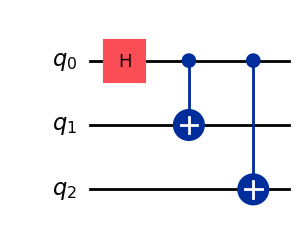

In [74]:
circ.draw('mpl')

When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most books. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the <em><strong>left</strong></em> side of the tensor product, so that the basis vectors are labeled as  $Q_{n-1}\otimes \cdots  \otimes  Q_1\otimes Q_0$.

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many books would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices. For example, conventionally (as you all might have studied in the quantum circuit meet) a controlled-X ($C_{X}$) operation with qubit 0 being the control and qubit 1 being the target is written as 
$$|0\rangle \langle0|\otimes I +|1\rangle \langle1|\otimes X$$ 
(Try to reason why this is correct representation of CNOT gate and find its matrix representation in computational basis). But, in Qiskit due to reverse indexing it is represented as 
$$I\otimes|0\rangle \langle0| +X\otimes|1\rangle \langle1|$$ 
With the matrix represention as
$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

## Simulating circuits <a name='simulation'></a>

To simulate a circuit we use the Statevector simulator from the quant_info module. This simulator returns the quantum state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits (so be careful using this as it will quickly get too large to run on your machine). But remember that this is not an actual simulator and doesn't perform any measurements. It just checks what circuit you have made and what the final statevector (wavefunction) will be.

There are two stages to the simulator. The first is to set the input state and the second to evolve the state by the quantum circuit.

In [75]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [76]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

## Unitary representation of a circuit

Qiskit's quant_info module also has an operator method which can be used to make a unitary operator for the circuit. This calculates the $2^n \times 2^n$ matrix representing the quantum circuit. 

In [77]:
from qiskit.quantum_info import Operator
import sympy as sp

U = Operator(circ)

# Show the results
M = sp.Matrix(U.data)
print(M)

Matrix([[0.707106781186547, 0.707106781186547, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.707106781186547, -0.707106781186547], [0, 0, 0.707106781186547, 0.707106781186547, 0, 0, 0, 0], [0, 0, 0, 0, 0.707106781186547, -0.707106781186547, 0, 0], [0, 0, 0, 0, 0.707106781186547, 0.707106781186547, 0, 0], [0, 0, 0.707106781186547, -0.707106781186547, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.707106781186547, 0.707106781186547], [0.707106781186547, -0.707106781186547, 0, 0, 0, 0, 0, 0]])


## Actual Simulation

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by _measuring_ each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state

$$|\psi\rangle = (|000\rangle +|111\rangle)/\sqrt{2},$$

and let $xyz$ denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. 


<b>Note:</b> This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way (qubit representing the MSB has index 0), which is why Qiskit uses a non-standard tensor product order.


Recall the probability of obtaining outcome $xyz$ is given by

$$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$$

and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different simulator. Now that we will try to simulate meausrements in Qiskit, we should first learn about `ClassicalRegister` and how it works. It is a fundamental data structure that serve as storage for classical information, primarily the outcomes of quantum measurements. Let's see how we can impliment it

In [78]:
from qiskit import ClassicalRegister

# Creating registers
qr3 = QuantumRegister(3, 'qubits')
qr4 = QuantumRegister(2, 'ancilla')
cr = ClassicalRegister(2, 'meas')     # Classical bits

# Circuit with 5 qubits (3 + 2) and 2 classical bits
circ3 = QuantumCircuit(qr3, qr4, cr)
print(circ3)

           
 qubits_0: 
           
 qubits_1: 
           
 qubits_2: 
           
ancilla_0: 
           
ancilla_1: 
           
   meas: 2/
           


But in our simpler circuits where we don't explicitly create registers for our qubits we can use `QuantumCircuit(3, 3)` where the first argument creates a `QuantumRegister` with 3 qubits and 2nd argument creates a `ClassicalRegister` with 3 bits.

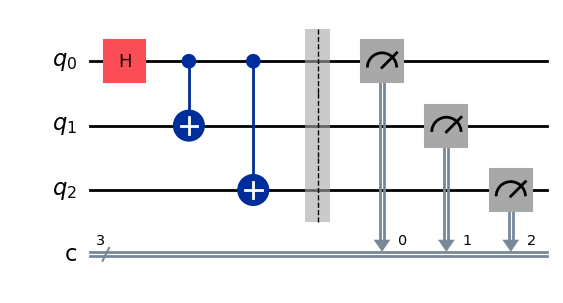

In [79]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

`meas.barrier(range(3))` applies a visual and functional barrier to the specified qubits. A barrier in Qiskit prevents the compiler from reordering or merging gates across it while it tries to optimize the circuit if you transpile (will explain latter what this means) the circuit (essential step for running on real quantum hardware). This ensures operations execute in the exact order you define. Use it to isolate circuit sections or debug quantum programs. This circuit also adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits.

In Qiskit the transpiler is a critical tool that optimizes and adapts your quantum circuit to run efficiently on real hardware. It does it by merging/canceling redundant gates and replacing high-level gates with hardware-supported ones, for example decomposing Toffoli gate into CX and single-qubit gates.

To simulate this circuit, we use the `AerSimulator`. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the `execute` function, via the `shots` keyword.

In [80]:
# Adding the transpiler to optimize the circuit (But this is not necessary in AerSimulator unlike for real hardware runs)
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
qc_compiled = transpile(qc, backend)

# We've set the number of repeats of the circuit to be 1024
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the aggregated binary outcomes of the circuit you submitted.

In [81]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 538, '000': 486}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

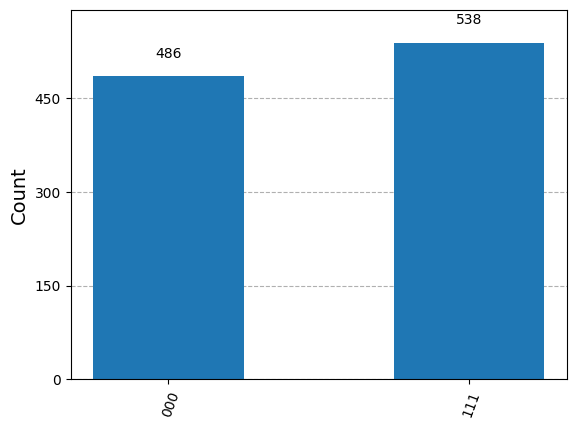

In [82]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

## Working on Real Quantum Computers

Now we will see how to run our circuit in IBM's real quantum hardware. Firstly we will use the `qiskit_ibm_runtime` package for this.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Uncomment the line below when you try to acccess IBM quantum hardware for the first time, this will save our account so you can directly use it later
#QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token="paste you api token from the IBM Quantum Platform here")

service = QiskitRuntimeService()  # Loads your saved credentials

# List available backends
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]


In [84]:
backend = service.least_busy(operational=True, min_num_qubits=5)

`.least_busy(operational=True, min_num_qubits=5)` is used to find the quantum backend (real hardware device) that currently has the shortest queue or lowest workload. The idea is to pick a device that will execute your job the fastest. The first argument ensures that the selected backend is currently online and functioning correctly. While the second argument ensures that backend supports atleast 5 qubits (not necessary here, added just for informational purpose).

In [ ]:
print(                                 # Displays the details of the selected backend
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127



Now, we will transpile the circuit as it is necessary in this case (to make the circuit compatible with the backend's capabilities). `optimization_level` argument controls the aggressiveness of the optimization process. It tells the transpiler how much effort to put into reducing the circuit's depth and gate count. Level 2 means medium optimization. By default it is set to 1, 0 means no optimization.

In [86]:
# First we have to transpile the quantum circuit 
qc_compiled = transpile(qc, backend, optimization_level=2)

As we can see below, after transpiling the circuit it has been transformed to the hardware compatible format. Out of the 127 available qubits, qubits 41, 42 and 51 are used to impliment out circuit while the rest are kept as ancillas.

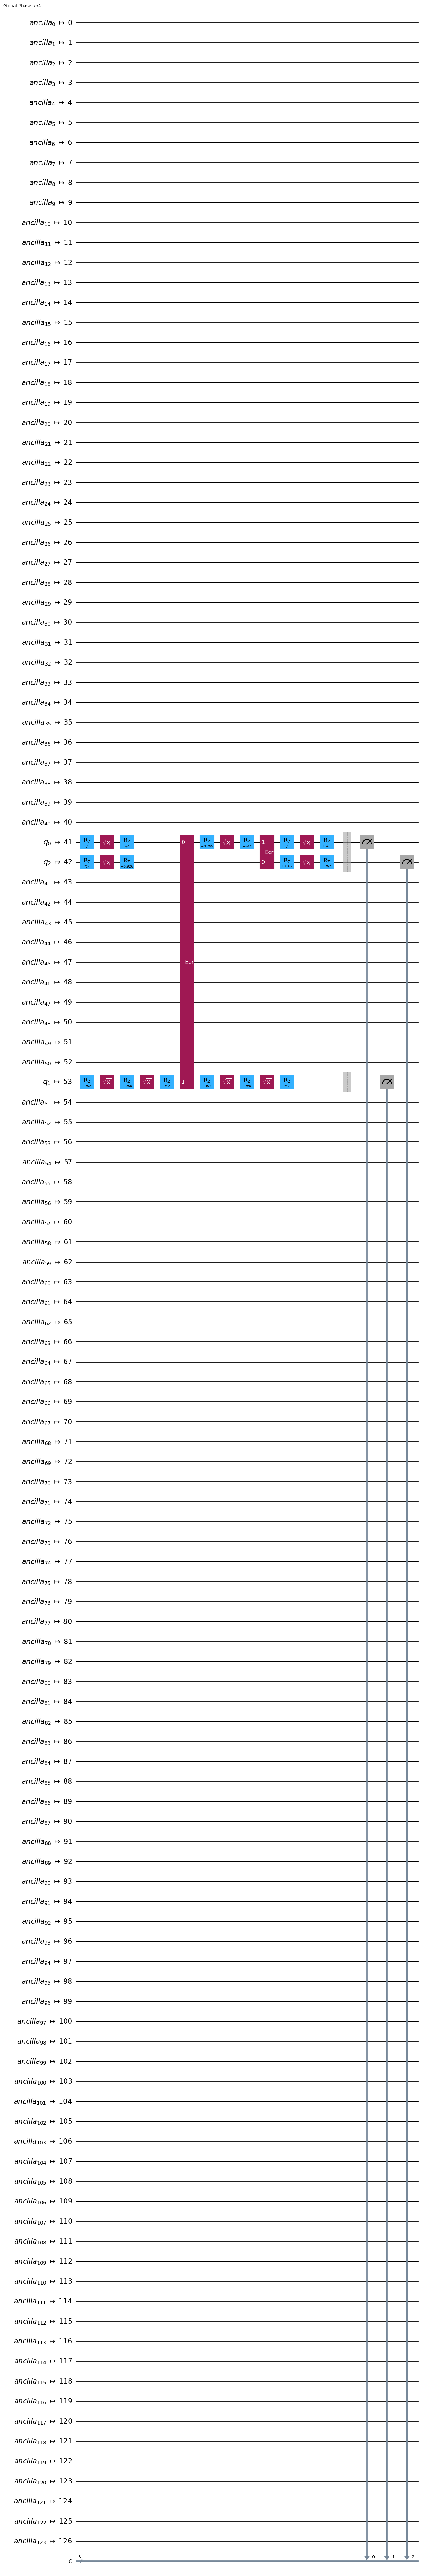

In [87]:
qc_compiled.draw('mpl')

In Qiskit, `Sampler` and `Estimator` are the two primary ways one can send job instructions to real hardware. The Sampler is designed to efficiently return probability distributions of measurement outcomes in the computational basis, just like what we did with AerSimulator previously. Estimator is designed to efficiently calculate the expectation values of quantum observables. While you can use the Sampler to approximately estimate the state and then manually calculate the expectation value, estimator is just the efficient and better method (mostly due to error in state estimation using sampler as the dimensions of the Hilbert space increases).

In [89]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(mode=backend)

In [ ]:
job = sampler.run([qc_compiled],shots=1024)  # shots define how many times the measurement made

c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:863: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  Returns:


In [ ]:
# Getting the results
result = job.result()
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'000': 500, '111': 491, '010': 13, '101': 7, '100': 8, '011': 2, '110': 2, '001': 1}


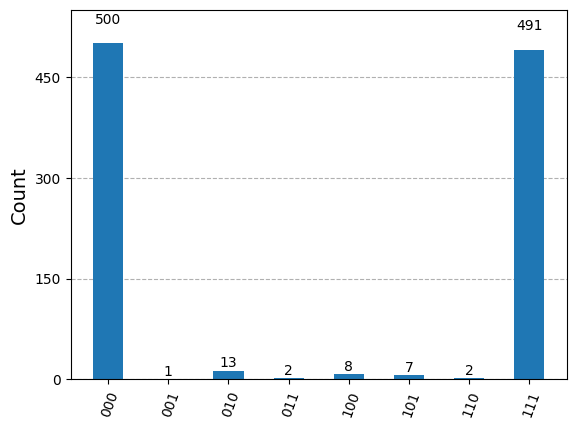

In [92]:
counts = pub_result.data.c.get_counts()
plot_histogram(counts)

As we can see from the histogram above, there are a few instances of measuresing those states which must be impossible to measure (due to 0 prob.) for our state construction. This is due to the errors in real quantum hardware (The real 'kebab me haddi' preventing the quantum revolution from its onset). 

But since using real quantum computers comes at a cost (using up the free 10 mins provided monthly to free users), we will often find ourselves using the `AerSimulator` but with synthetically adding errors in it to better simulate the real quantum computers. Below we will see how to add errors in the `AerSimulator`. For this we will be using the `qiskit_aer.noise` module.

In [ ]:
from qiskit_aer.noise import NoiseModel

In [94]:
backend.name

'ibm_brisbane'

`NoiseModel.from_backend(backend)` helps us create a statistical model of the noise and errors characteristic of the specific real quantum hardware backend that we have chosen. We will used this model for replicating errors in `AerSimulator`.

In [95]:
# Configure noise model
noise_model = NoiseModel.from_backend(backend)

In [ ]:
backend = AerSimulator(noise_model=noise_model)

qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)

In [ ]:
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)

print(counts)

{'111': 500, '000': 447, '100': 4, '110': 28, '010': 13, '001': 19, '011': 2, '101': 11}


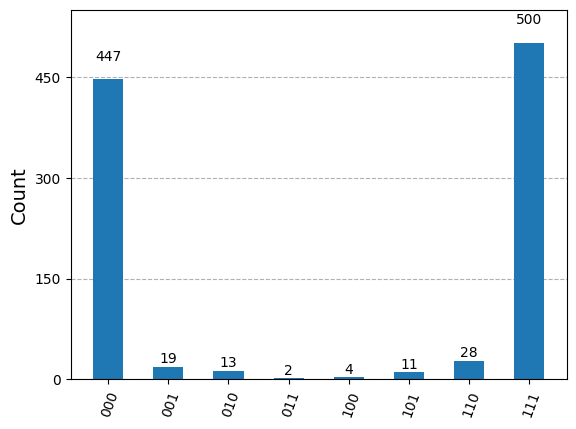

In [101]:
plot_histogram(counts)

# Assignment 1

Now that you have learnt most of the basics of Qiskit, we can start with our first assigment. Below is the details of what you have to do in this assignment:
1. Create the circuit for superdense coding (using 2 qubits and 2 classical bits) and check its validity using Statevector for all the 4 possible cases.
2. Run it on AerSimulator (no noise) and Real Quantum Hardware (1024 shots for both) for transmitting the classical bits 11 and find how many times do you send correct message by plotting histogram.
3. Imagine a utopian future where the world has undergone a technological revolution, a time when quantum infrastructure is so advanced that transmitting qubits across the globe is far cheaper than sending classical bits. In this future, quantum communication is preferred over traditional communication protocols, and superdense coding has become the new standard for efficient data transfer. Instead of sending one classical bit at a time, entire messages are now compressed into entangled qubit pairs and decoded on the other side. In this part of the assignment, you’ll step into this future and your task is to encode a classical message using superdense coding, simulate its quantum transmission and then reconstruct it at the receiver’s end, all while exploring one of the earliest and most insightful ideas that shaped the field of quantum communication.
<br>
<br>
(i) Use the functions below to encode any word into bit sequence and use 2 bits at a time to transfer it to the receiver’s end and again changing the sequence back into strings to retrive the word being sent.
<br>
<br>
(ii) Firstly you will use the nosie-free AerSimulator to check if you circuit is working fine.
<br>
<br>
(iii) Now you will run this circuit on a real hardware to send a message. Remember that real hardwares have errors so the word that you are trying to send might change into something entirely different upon its arrival at the reciever's end.
<br>
<br>
(iv) Since running this circuit even once would've shaved off atleast 30s from the free 10 mins of your plan, so going forward we will be using noise induced AerSimulator for running our circuit.
<br>
<br>
(v) Run your circuit as many times as you want on this noisy AerSimulator and see your message humorously turn into something completely different.
<br>
<br>
(vi) Since in this future qubit transmission is cheaper but not infinitely cheaper, so we have to make sure that correct message is transmitted most certainly as cheaply as possible. Can you find a way through which you can send correct message (almost always) through noisy AerSimulator in as little tries as possible? Hint (almost all the answer) is given below but I want you to think about it on your own for sometime to foster new ideas and if you can't find any such method after sometime then look at the hint and try to impliment that.

In [ ]:
def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 
# Remember for each letter in your word it will add 8 more bits so choose a relatively shorter word ~12 letters or less

In [107]:
# Example
sequence = word_to_binary("Hello")
print(sequence)

0100100001100101011011000110110001101111


In [106]:
def binary_to_word(binary_str):
    # Pad with zeros if length not multiple of 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

In [108]:
# Example
word = binary_to_word(sequence)
print(word)

Hello


<br>
<br>
<br>
<br>
<br>
<br>
<br>
Hint for (iv): To solve this problem you can use majority voting, a simple but effective error mitigation strategy to correct noise induced errors in superdense coding. By transmitting the same message multiple times (say, 10 trials) using a noisy simulator, we collect statistics on each bit position in the received binary string. For each position, we select the bit value (0 or 1) that appeared most frequently across all trials, effectively "voting out" random errors caused by noise. This works because while individual transmissions may be corrupted, the statistical consensus will converges toward the correct bit. Though not always correct (especially for large errors), it demonstrates how redundancy can combat quantum errors without full error correction. In real-world quantum systems, such methods are often combined with more advanced techniques are often used for quantum error correction. For example this is result of just using 3 trails for majority voting, see how each individual message makes no sense but after majority voting correct message is delivered:
<br>
DivyanrH
<br>
Divxansè
<br>
Ti@yan3h
<br>
After error mitigation: Divyansh